In [92]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.optimize import curve_fit
import random

## 1

In [8]:
def valor_medio(f, a_x, b_x, a_y, b_y, n):
    x = (b_x - a_x)*np.random.random(n) + a_x
    y = (b_y - a_y)*np.random.random(n) + a_y
    i = (b_x-a_x)*(b_y-a_y)*(np.sum(f(x, y))) / n
    return i

In [9]:
a_x, b_x = 1, 5
a_y, b_y = -5, 5
i_excato = 1.33199*(10**9)
f = lambda x,y: ((y**2)*np.exp(-y**2)+(x**4)*np.exp(-x**2))/(x*np.exp(-x**2))

In [10]:
n = 10**5
i_medio = valor_medio(f, a_x, b_x, a_y, b_y, n)
e_abs = np.abs(i_medio - i_excato)/np.abs(i_excato)
print("Para n = 10^5")
print("Valor medio: ", i_medio)
print("Error: ", e_abs)

Para n = 10^5
Valor medio:  1330403602.152495
Error:  0.0011909983164326253


In [11]:
n = 10**6
i_medio = valor_medio(f, a_x, b_x, a_y, b_y, n)
e_abs = np.abs(i_medio - i_excato)/np.abs(i_excato)
print("Para n = 10^6")
print("Valor medio: ", i_medio)
print("Error: ", e_abs)

Para n = 10^6
Valor medio:  1315910274.3609753
Error:  0.012071956725669663


In [12]:
n = 10**7
i_medio = valor_medio(f, a_x, b_x, a_y, b_y, n)
e_abs = np.abs(i_medio - i_excato)/np.abs(i_excato)
print("Para n = 10^7")
print("Valor medio: ", i_medio)
print("Error: ", e_abs)

Para n = 10^7
Valor medio:  1331857470.937878
Error:  9.94970398592381e-05


## 4

### a)

In [13]:
def CamAleaPasosVar(N, trials, lambda_param):
    start_time = time.time()
    X = np.zeros((trials, N))
    
    for i in range(N):
        steps = np.random.exponential(scale=1/lambda_param, size=trials)
        directions = np.random.choice([-1, 1], size=trials)
        dx = steps * directions
        X[:, i] = dx
    
    X = np.cumsum(X, axis=1)
    R2 = np.mean(X**2, axis=0)
    Xmean = np.mean(X, axis=0)
    XparaN = X[:, -1]
    
    tiempo = time.time() - start_time
    nu = np.log(R2[-1]) / np.log(N) 
    
    return Xmean, R2, XparaN, nu, tiempo

In [14]:
def plots(N, Xmean, R2, XparaN, title, nu, tiempo):
    Ngraf = np.arange(1, N + 1)
    fig = plt.figure(figsize=(14, 7))  # Adjusted for better visibility

    # Plot ⟨X⟩, ⟨X^2⟩, and ⟨(ΔX)^2⟩
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.plot(Ngraf, Xmean, 'b', label=r'$\langle X \rangle$')
    ax1.plot(Ngraf, Xmean**2, 'r', label=r'$\langle X^2 \rangle$')
    ΔX2 = R2 - Xmean**2
    ax1.plot(Ngraf, ΔX2, 'g', label=r'$\langle (\Delta X)^2 \rangle$')
    ax1.legend(loc='best', fontsize=12)
    ax1.set_xlabel(r'$N$', fontsize=18)
    ax1.set_ylabel('Values', fontsize=18)
    ax1.set_title(title)

    # Plot R^2 over N
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.plot(Ngraf, R2, 'b', label=r'$R^2$ vs. $N$')
    ax2.legend(loc='best', fontsize=12)
    ax2.set_xlabel(r'$N$', fontsize=18)
    ax2.set_ylabel(r'$R^2$', fontsize=18)

    # Plot P(x) over x
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.hist(XparaN, bins=50, density=True, label='Histogram of $X_N$')
    ax3.set_xlabel(r'$x$', fontsize=18)
    ax3.set_ylabel(r'$P(x)$', fontsize=18)
    ax3.legend(loc='best', fontsize=12)

    # Title for the entire figure
    fig.suptitle(f'Exponente ν: {nu:.4f}, Tiempo de ejecución: {tiempo:.2f} s', fontsize=16)

    fig.tight_layout()
    plt.show()

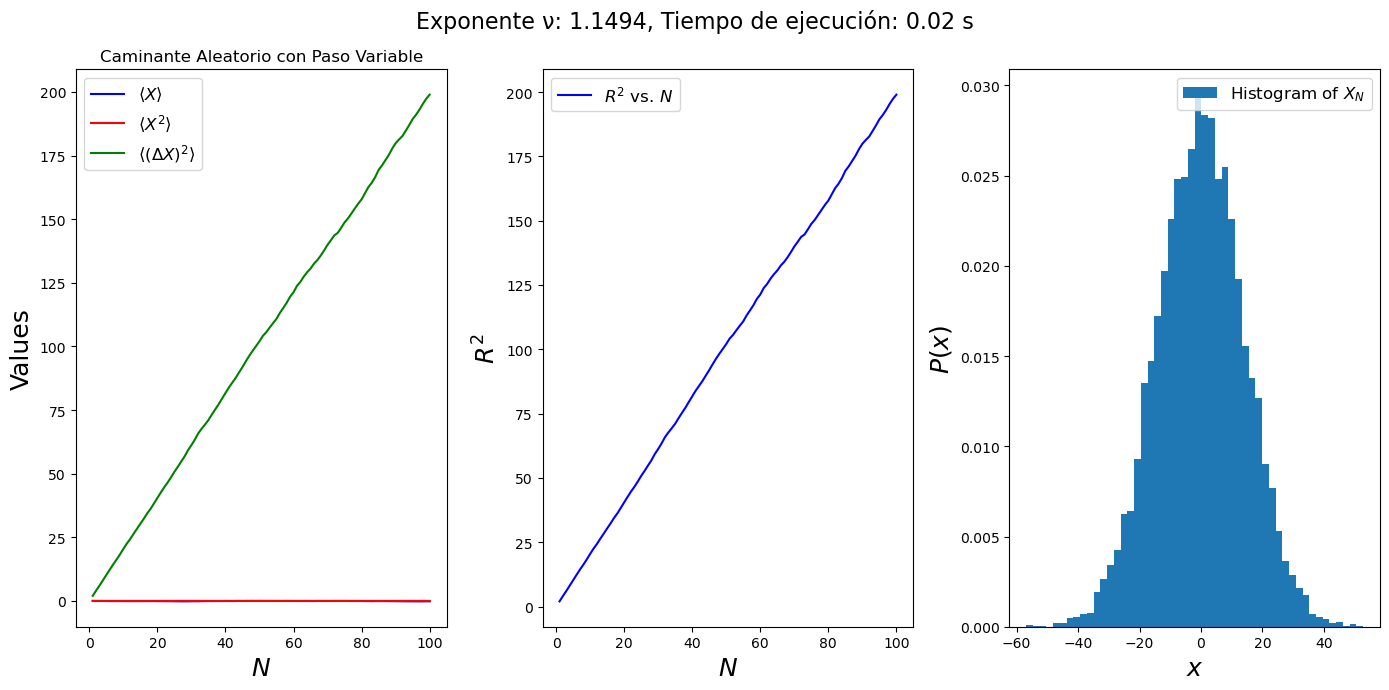

In [15]:
N = 100  
trials = 10000
lambda_param = 1.0  # Esto es 1 sobre el valor esperado de la longitud del paso.

Xmean, R2, XparaN, nu, tiempo = CamAleaPasosVar(N, trials, lambda_param)
plots(N, Xmean, R2, XparaN, "Caminante Aleatorio con Paso Variable", nu, tiempo)


### b)

In [16]:
def CamAleaPasosVarUniforme(N, trials):
    start_time = time.time()
    X = np.zeros((trials, N))
    
    for i in range(N):
        # Generar pasos con una distribución uniforme entre 0.5 y 1.5
        steps = np.random.uniform(0.5, 1.5, size=trials)
        # Cada paso puede ser en dirección positiva o negativa con igual probabilidad
        directions = np.random.choice([-1, 1], size=trials)
        dx = steps * directions
        X[:, i] = dx
    
    X = np.cumsum(X, axis=1)
    R2 = np.mean(X**2, axis=0)
    Xmean = np.mean(X, axis=0)
    XparaN = X[:, -1]
    
    tiempo = time.time() - start_time
    nu = np.log(R2[-1]) / np.log(N)  # Este es el exponente de escalamiento
    
    return Xmean, R2, XparaN, nu, tiempo


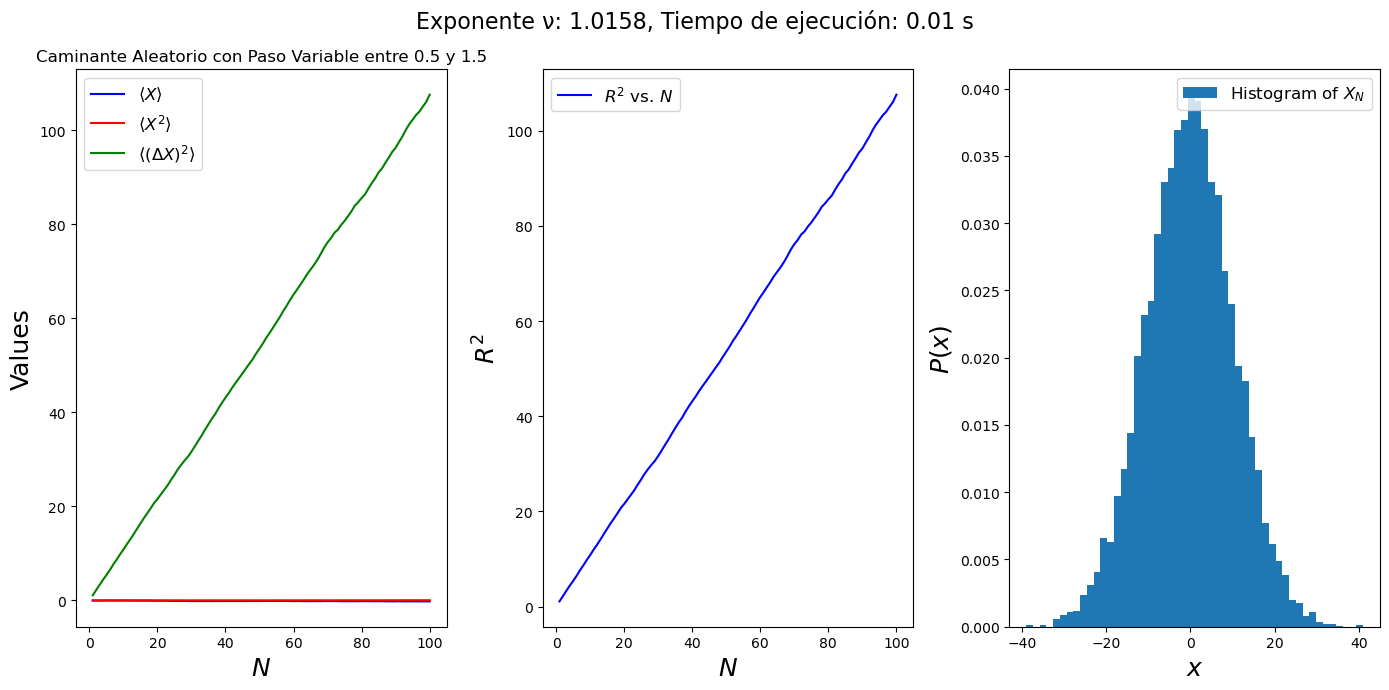

In [17]:
N = 100  
trials = 10000

Xmean_b, R2_b, XparaN_b, nu_b, tiempo_b = CamAleaPasosVarUniforme(N, trials)
plots(N, Xmean_b, R2_b, XparaN_b, "Caminante Aleatorio con Paso Variable entre 0.5 y 1.5", nu_b, tiempo_b)


### c)

In [18]:
# Método de aceptación-rechazo para generar números con la distribución 1/a^2
def generate_steps(size):
    max_value = 1  # Establecido porque sabemos que C/a^2 <= 1 para a >= 1
    steps = []
    while len(steps) < size:
        a = np.random.uniform(1, 2)  # Escoge un rango que sea manejable computacionalmente
        prob = 1/a**2
        if np.random.uniform(0, max_value) < prob:
            steps.append(a)
    return np.array(steps)

In [19]:
def CaminanteAleatorioInverso(N, trials):
    start_time = time.time()
    X = np.zeros((trials, N))
    
    for i in range(N):
        steps = generate_steps(trials)
        directions = np.random.choice([-1, 1], size=trials)
        dx = steps * directions
        X[:, i] = dx
    
    X = np.cumsum(X, axis=1)
    R2 = np.mean(X**2, axis=0)
    Xmean = np.mean(X, axis=0)
    XparaN = X[:, -1]
    
    tiempo = time.time() - start_time
    nu = np.log(R2[-1]) / np.log(N)  # Este es el exponente de escalamiento
    
    return Xmean, R2, XparaN, nu, tiempo

In [23]:

#diferencia en el grafico sobre R^2 ahora es con plt.loglog() en lugar de plt.plot()

def plots_c(N, Xmean, R2, XparaN, title, nu, tiempo):
    Ngraf = np.arange(1, N + 1)
    fig = plt.figure(figsize=(14, 7))  # Ajustado para una mejor visibilidad

    # Gráfico de ⟨X⟩, ⟨X^2⟩, y ⟨(∆X)^2⟩
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.plot(Ngraf, Xmean, 'b', label=r'$\langle X \rangle$')
    ax1.plot(Ngraf, Xmean**2, 'r', label=r'$\langle X^2 \rangle$')
    ΔX2 = R2 - Xmean**2
    ax1.plot(Ngraf, ΔX2, 'g', label=r'$\langle (\Delta X)^2 \rangle$')
    ax1.legend(loc='best', fontsize=12)
    ax1.set_xlabel(r'$N$', fontsize=18)
    ax1.set_ylabel('Valores', fontsize=18)
    ax1.set_title(title)

    # Gráfico de R^2 sobre N en escala logarítmica
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.loglog(Ngraf, R2, 'b', base=10, label=r'$\log(R^2)$ vs. $\log(N)$')
    ax2.legend(loc='best', fontsize=12)
    ax2.set_xlabel(r'$\log(N)$', fontsize=18)
    ax2.set_ylabel(r'$\log(R^2)$', fontsize=18)

    # Gráfico de la función de distribución de la coordenada x
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.hist(XparaN, bins=50, density=True, label='Histograma de $X_N$')
    ax3.set_xlabel(r'$x$', fontsize=18)
    ax3.set_ylabel(r'$P(x)$', fontsize=18)
    ax3.legend(loc='best', fontsize=12)

    # Título para la figura entera
    fig.suptitle(f'Exponente ν: {nu:.4f}, Tiempo de ejecución: {tiempo:.2f} s', fontsize=16)

    fig.tight_layout()
    plt.show()

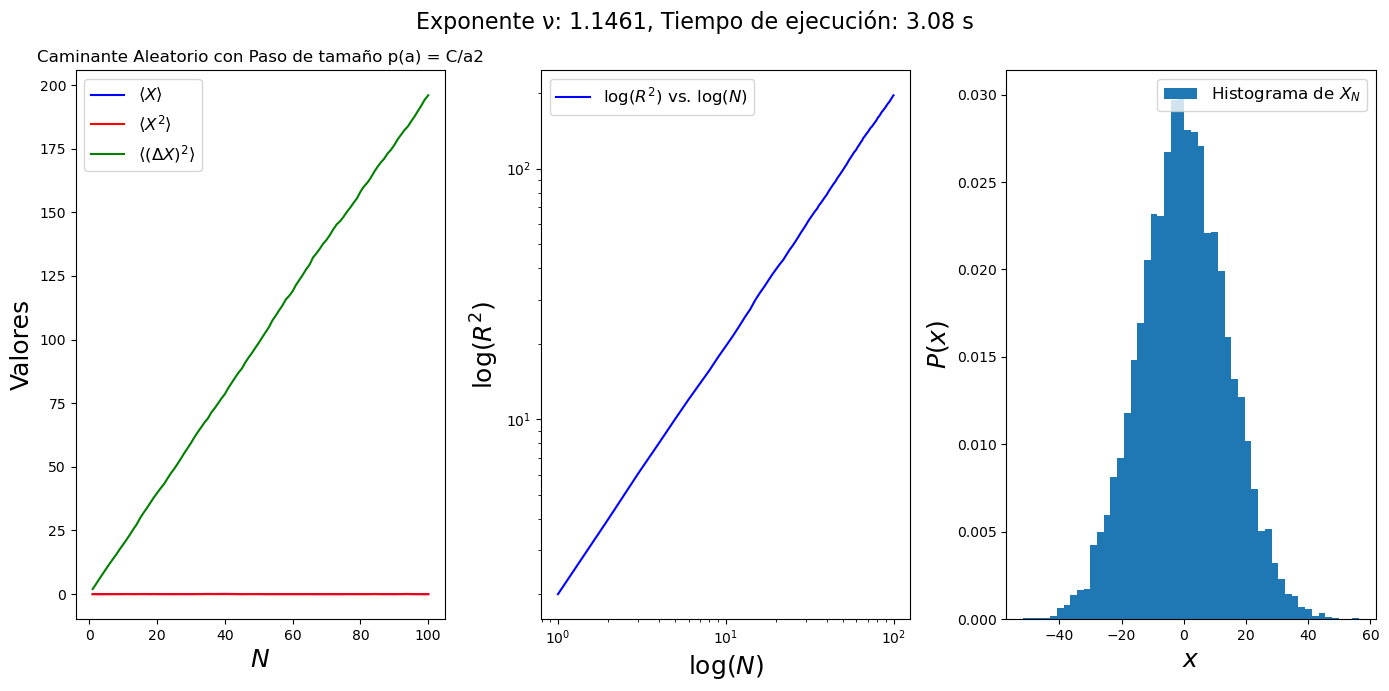

In [24]:
N = 100  
trials = 10000

Xmean_c, R2_c, XparaN_c, nu_c, tiempo_c = CaminanteAleatorioInverso(N, trials)
plots_c(N, Xmean_c, R2_c, XparaN_c, "Caminante Aleatorio con Paso de tamaño p(a) = C/a2", nu_c, tiempo_c)


## 5

### funciones

In [44]:
def permutation():
    global order, N
    order = np.random.permutation(N)

def vecino(s, j):
    global L, empty
    if j == 0:  # izquierda
        if s % L == 0:
            return empty
        else:
            return s - 1
    elif j == 1:  # derecha
        if s % L == L - 1:
            return empty
        else:
            return s + 1
    elif j == 2:  # abajo
        if s // L == 0:
            return empty
        else:
            return s - L
    elif j == 3:  # arriba
        if s // L == L - 1:
            return empty
        else:
            return s + L

def boundaries():
    global N, nn
    for s in range(N):
        for j in range(4):
            nn[s, j] = vecino(s, j)

# Definir la función findroot
def findroot(r, parent):
    while parent[r] >= 0 and r != parent[r]:
        r = parent[r]
    return r

def mergeroots(r1, r2):
    global spanclussize, parent, ns, touchesLeft, touchesRight, Ss, sum_s2_ns
    if r1 == r2:
        return r1
    elif -parent[r1] > -parent[r2]:
        ns[-parent[r1]] -= 1
        ns[-parent[r2]] -= 1
        sum_s2_ns -= parent[r1]**2
        sum_s2_ns -= parent[r2]**2
        parent[r1] += parent[r2]
        parent[r2] = r1
        ns[-parent[r1]] += 1
        sum_s2_ns += parent[r1]**2
        touchesLeft[r1] = touchesLeft[r1] or touchesLeft[r2]
        touchesRight[r1] = touchesRight[r1] or touchesRight[r2]
        if touchesLeft[r1] and touchesRight[r1]:
            spanclussize = -parent[r1]
        return r1
    else:
        ns[-parent[r1]] -= 1
        ns[-parent[r2]] -= 1
        sum_s2_ns -= parent[r1]**2 
        sum_s2_ns -= parent[r2]**2
        parent[r2] += parent[r1]
        parent[r1] = r2
        ns[-parent[r2]] += 1
        sum_s2_ns += parent[r2]**2
        touchesLeft[r2] = touchesLeft[r2] or touchesLeft[r1]
        touchesRight[r2] = touchesRight[r2] or touchesRight[r1]
        if touchesLeft[r2] and touchesRight[r2]:
            spanclussize = -parent[r2]
        return r2
    
def percolate():
    global spanclussize, order, parent, nn, ipc, ns, S, Ss, sum_s2_ns

    PSpan = []
    spanclussize = 0
    ns = np.zeros(N + 1, dtype=int)
    nspcpar = np.zeros(N + 1, dtype=int)  # Inicializar nspcpar aquí

    parent = empty * np.ones(N, dtype=int)

    S = []
    sum_s2_ns = 0  # Inicializar la suma acumulativa de s**2 * ns
    den = 0 

    for i in range(N):
        r1 = s1 = order[i]
        parent[s1] = -1
        ns[1] += 1
        sum_s2_ns += 1
        for j in range(4):
            s2 = nn[s1, j]
            if s2 != empty and parent[s2] != empty:
                r1 = mergeroots(r1, findroot(s2))
        
        PSpan.append(spanclussize / (i + 1))

        den = (i+1 - spanclussize)
        if den == 0:
            Ss = 0
        else:
            Ss = (sum_s2_ns - (spanclussize**2)) / den
        
        S.append(Ss)

        if i + 1 > spanclussize:
            S[i] = (sum_s2_ns - spanclussize**2) / (i + 1 - spanclussize)

        if i == ipc:
            nspcpar = np.copy(ns)

    return np.array(PSpan), nspcpar, S

def lineFit(x, y):
    ''' Returns slope and y-intercept of linear fit to (x,y)
    data set'''
    xavg = x.mean()
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return slope, yint

### nuevo cluster

In [45]:
parent = np.loadtxt('parent.txt', unpack=True)

# Parámetros
L = 1024  # Tamaño del sistema
N = L**2  # Número total de sitios

# Convertir 'parent' a enteros y manejar valores negativos grandes como 'empty'
parent = np.array(parent, dtype=np.int64)
empty_value = -1 * (2**30)  # Un valor negativo grande para representar 'empty'
parent[parent < 0] = empty_value

# Inicializar el arreglo para contar los tamaños de los aglomerados
cluster_count = np.zeros(N + 1, dtype=np.int64)

# Procesar el arreglo 'parent' para calcular 'ns'
for site_id in range(N):
    site_parent = parent[site_id]
    if site_parent != empty_value:
        root = findroot(site_id, parent)
        if root != empty_value:
            cluster_count[root] += 1

# Eliminar la entrada 'empty' y ceros (que corresponden a sitios no raíz)
cluster_count = cluster_count[cluster_count > 0]

# Calcular 'ns', el número de aglomerados de cada tamaño
unique_sizes, counts = np.unique(cluster_count, return_counts=True)
ns_distribution = dict(zip(unique_sizes, counts))

# Calcular la fracción de ocupación 'p'
occupied_sites = np.sum(cluster_count)
p = occupied_sites / N

In [46]:
# 'ns_distribution' ahora contiene la distribución de tamaños de aglomerados 'ns'
# 'p' contiene la fracción de ocupación
print(f"Distribución de tamaños de aglomerados (ns): {ns_distribution}")
print(f"Fracción de ocupación (p): {p}")

Distribución de tamaños de aglomerados (ns): {1: 8071, 2: 5230, 3: 3526, 4: 2471, 5: 1988, 6: 1518, 7: 1220, 8: 991, 9: 892, 10: 759, 11: 643, 12: 592, 13: 527, 14: 441, 15: 417, 16: 346, 17: 323, 18: 286, 19: 260, 20: 261, 21: 240, 22: 220, 23: 218, 24: 233, 25: 189, 26: 159, 27: 155, 28: 139, 29: 131, 30: 122, 31: 131, 32: 105, 33: 135, 34: 110, 35: 86, 36: 80, 37: 80, 38: 86, 39: 101, 40: 73, 41: 80, 42: 84, 43: 71, 44: 65, 45: 56, 46: 60, 47: 56, 48: 67, 49: 55, 50: 56, 51: 66, 52: 41, 53: 54, 54: 49, 55: 41, 56: 45, 57: 47, 58: 38, 59: 41, 60: 46, 61: 30, 62: 48, 63: 20, 64: 32, 65: 24, 66: 29, 67: 29, 68: 35, 69: 26, 70: 28, 71: 24, 72: 25, 73: 23, 74: 35, 75: 25, 76: 16, 77: 31, 78: 22, 79: 26, 80: 20, 81: 20, 82: 18, 83: 13, 84: 33, 85: 16, 86: 15, 87: 20, 88: 23, 89: 20, 90: 14, 91: 17, 92: 19, 93: 15, 94: 7, 95: 14, 96: 12, 97: 13, 98: 14, 99: 11, 100: 16, 101: 10, 102: 10, 103: 7, 104: 10, 105: 11, 106: 10, 107: 14, 108: 12, 109: 12, 110: 11, 111: 10, 112: 13, 113: 7, 114: 8

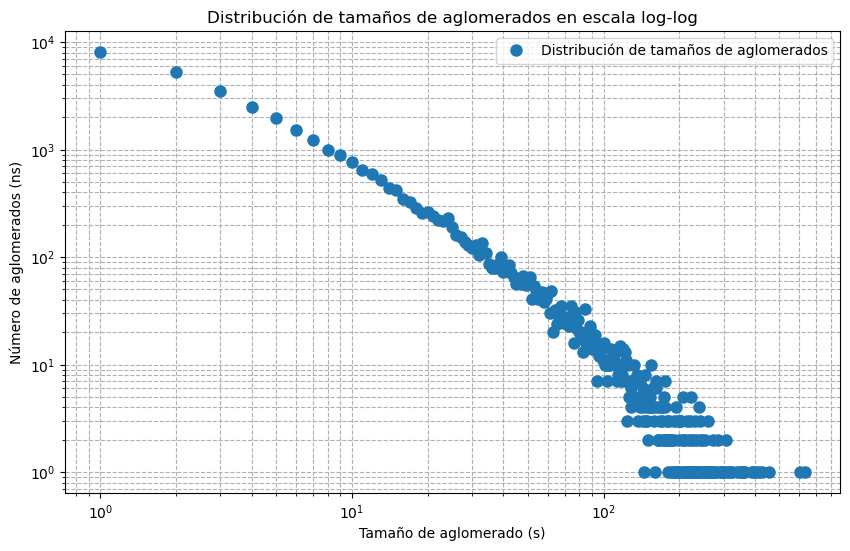

In [43]:
# Graficar la distribución de tamaños de aglomerados 'ns' en escala log-log
plt.figure(figsize=(10, 6))
plt.loglog(unique_sizes, counts, 'o', markersize=8, label='Distribución de tamaños de aglomerados')
plt.xlabel('Tamaño de aglomerado (s)')
plt.ylabel('Número de aglomerados (ns)')
plt.title('Distribución de tamaños de aglomerados en escala log-log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

## 6

### funciones triangulares

In [62]:
def vecino_triangular(s, L):
    """
    Calculate neighbors in a triangular grid for a site s.
    """
    vecinos = []
    row, col = divmod(s, L)
    # Add horizontal neighbors
    if col > 0: vecinos.append(s - 1)
    if col < L - 1: vecinos.append(s + 1)
    # Add neighbors in the next row
    if row < L - 1: 
        vecinos.append(s + L)
        if col > 0: vecinos.append(s + L - 1)
    # Add neighbors in the previous row
    if row > 0:
        vecinos.append(s - L)
        if col < L - 1: vecinos.append(s - L + 1)
    return vecinos

def boundaries_triangular(L):
    """
    Setup boundaries for a triangular grid.
    """
    N = L**2
    nn = {}
    for s in range(N):
        nn[s] = vecino_triangular(s, L)
    return nn

def permutation(N):
    """
    Generate a random permutation of N elements.
    """
    return np.random.permutation(N)

def findroot(r, parent):
    """
    Find the root of site r with path compression.
    """
    root = r
    while parent[root] != root:
        root = parent[root]
    while r != root:
        next_r = parent[r]
        parent[r] = root
        r = next_r
    return root

def mergeroots(r1, r2, parent, ns):
    """
    Merge the trees of r1 and r2 roots.
    """
    if r1 == r2:
        return r1  # No need to merge the same root

    # Make sure r1 is the root of the larger tree
    if ns[r1] < ns[r2]:
        r1, r2 = r2, r1
    
    # Merge the trees
    ns[r1] += ns[r2]
    ns[r2] = 0
    parent[r2] = r1

    return r1

def percolate(L, N, empty, order, nn, parent):
    """
    Perform percolation simulation on a triangular lattice.
    """
    PSpan = np.zeros(N)
    spanclussize = 0
    ns = np.zeros(N + 1, dtype=int)
    parent = np.full(N, empty, dtype=int)  # Initialize parent array

    S = np.zeros(N)
    sum_s2_ns = 0

    for i in range(N):
        s1 = order[i]
        parent[s1] = s1  # Occupy the site
        ns[1] += 1
        sum_s2_ns += 1

        # Check and merge with neighbors
        for s2 in nn[s1]:
            if parent[s2] != empty:
                root1 = findroot(s1, parent)
                root2 = findroot(s2, parent)
                if root1 != root2:
                    new_root = mergeroots(root1, root2, parent, ns)
                    if new_root == root1:
                        spanclussize = max(spanclussize, ns[root1])
                    else:
                        spanclussize = max(spanclussize, ns[root2])

        PSpan[i] = spanclussize / N

        # Calculate average cluster size excluding the spanning cluster
        den = N - spanclussize
        if den == 0:
            S[i] = 0
        else:
            S[i] = (sum_s2_ns - ns[spanclussize]**2) / den

    return PSpan, ns, S

### simulación

In [70]:
sizes = [16, 32, 64, 128]  # Tamaños de la red a simular
muestras = 100  # Número de realizaciones

# Diccionarios para guardar los resultados promediados
sprom_dict = {}
Pspanprom_dict = {}

for L in sizes:
    N = L**2
    empty = -1  # Representation for an empty site
    nn = boundaries_triangular(L)  # Setup neighbors for a triangular grid
    
    # Initialize arrays to accumulate results
    sprom_acum = np.zeros(N)
    Pspanprom_acum = np.zeros(N)
    
    # Perform simulations
    for _ in range(muestras):
        order = permutation(N)
        parent = np.full(N, empty, dtype=int)
        
        # Conduct the simulation
        PSpan, nspc, S = percolate(L, N, empty, order, nn, parent)
        
        # Accumulate results to average later
        sprom_acum += S
        Pspanprom_acum += PSpan
    
    # Average over all the samples
    sprom_dict[L] = sprom_acum / muestras
    Pspanprom_dict[L] = Pspanprom_acum / muestras

### gráficas

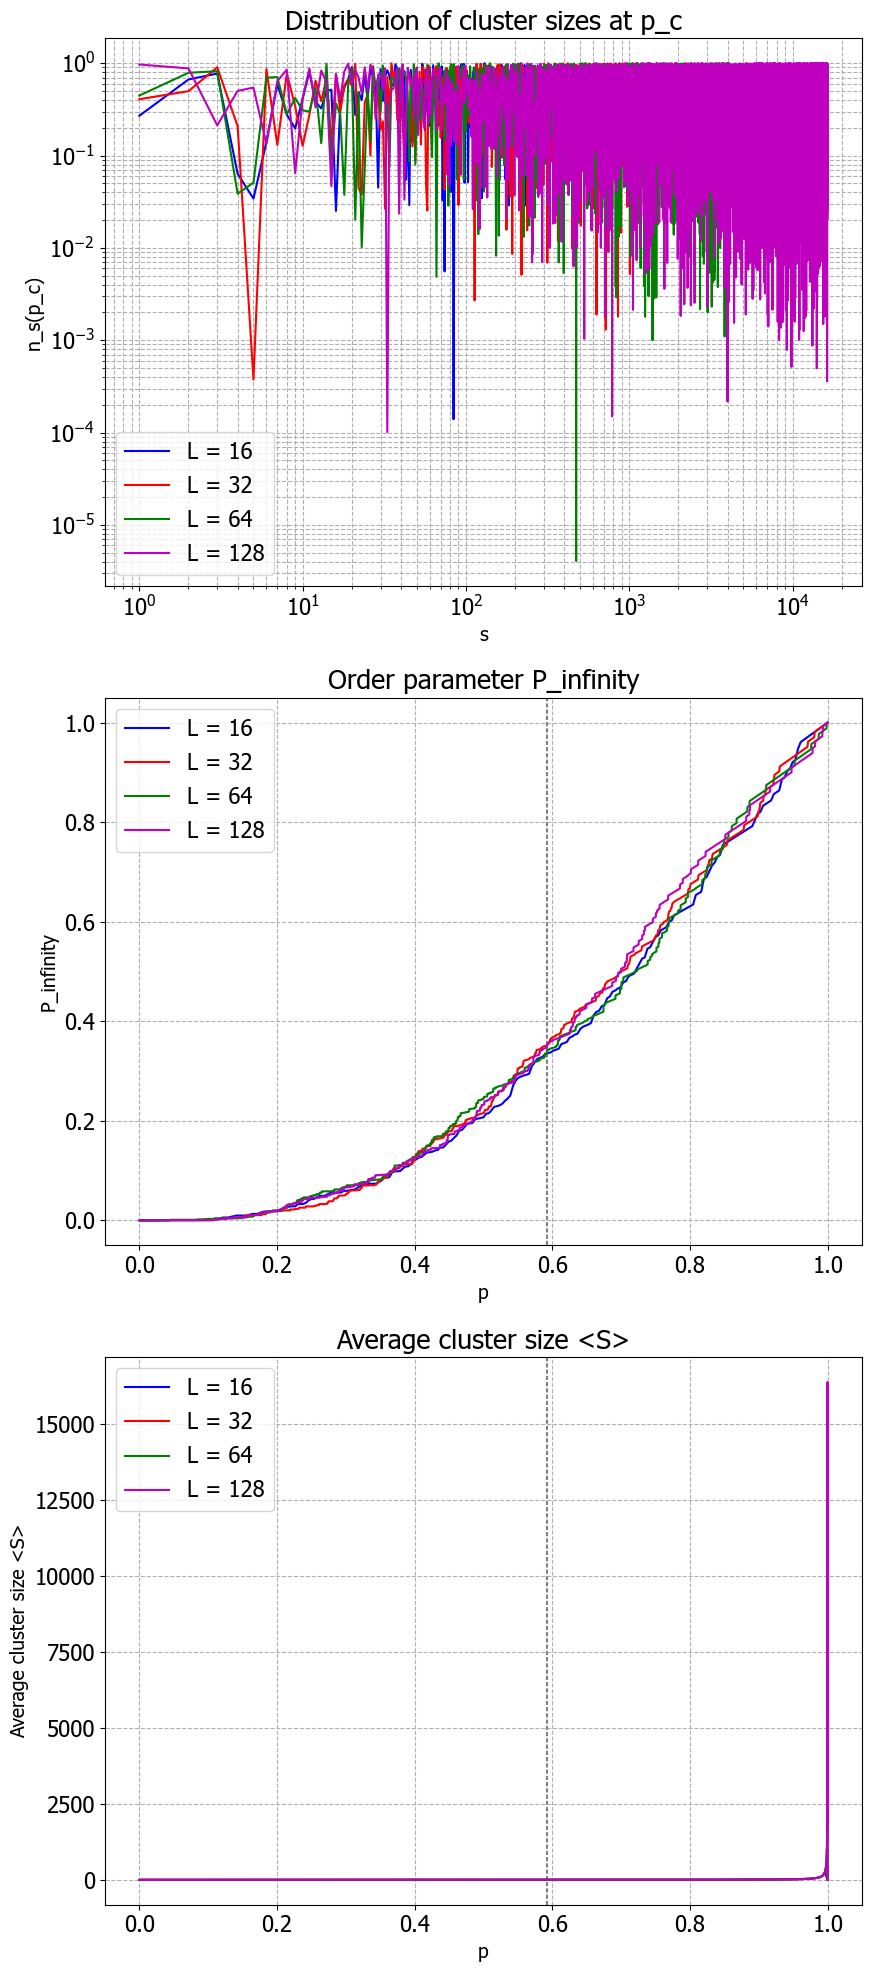

In [71]:
# Establecer estilo de gráficas
plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Tahoma']
plt.rc('mathtext', fontset='stix')

# Crear figuras para las gráficas
fig, axs = plt.subplots(3, 1, figsize=(9, 20))

colors = ['b', 'r', 'g', 'm', 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

for i, L in enumerate(sizes):
    N = L**2
    p = np.arange(1, N + 1) / N
    s = np.arange(1, N + 1)
    
    # Distribución de tamaño de clusters en p_c
    if L in nspc_dic:
        axs[0].loglog(s, nspc_dic[L], color=colors[i], label=f"L = {L}")
    
    # Parámetro de orden P_infty
    if L in Pspanprom_dict:
        axs[1].plot(p, Pspanprom_dict[L], color=colors[i], label=f"L = {L}")
    
    # Tamaño promedio del aglomerado S
    if L in sprom_dict:
        axs[2].plot(p, sprom_dict[L], color=colors[i], label=f"L = {L}")

# Configurar gráficas: títulos, etiquetas, etc.
axs[0].set_xlabel("s", fontsize=14)
axs[0].set_ylabel("n_s(p_c)", fontsize=14)
axs[0].set_title("Distribution of cluster sizes at p_c")
axs[0].grid(True, which="both", ls="--")
axs[0].legend()

axs[1].set_xlabel("p", fontsize=14)
axs[1].set_ylabel("P_infinity", fontsize=14)
axs[1].set_title("Order parameter P_infinity")
axs[1].axvline(pc, color="gray", dashes=(2, 1), zorder=-1)
axs[1].grid(True, which="both", ls="--")
axs[1].legend()

axs[2].set_xlabel("p", fontsize=14)
axs[2].set_ylabel("Average cluster size <S>", fontsize=14)
axs[2].set_title("Average cluster size <S>")
axs[2].axvline(pc, color="gray", dashes=(2, 1), zorder=-1)
axs[2].grid(True, which="both", ls="--")
axs[2].legend()

# Ajustar el layout de las figuras y mostrarlas
fig.tight_layout()
plt.show()

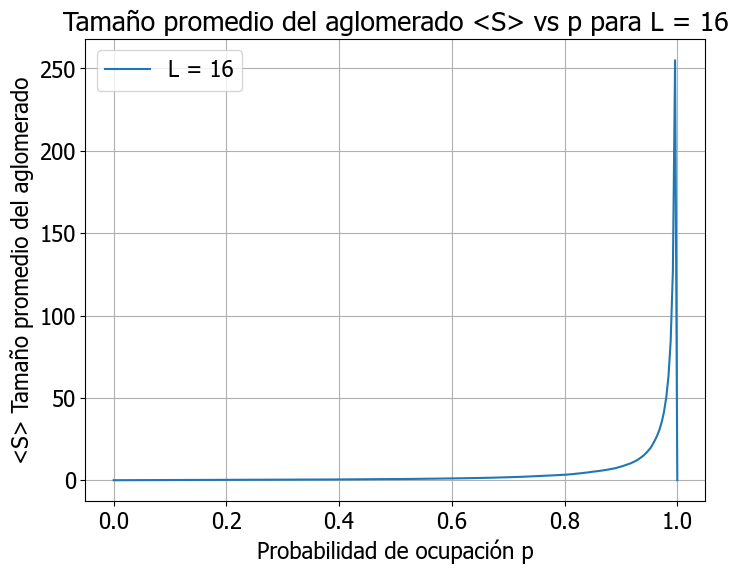

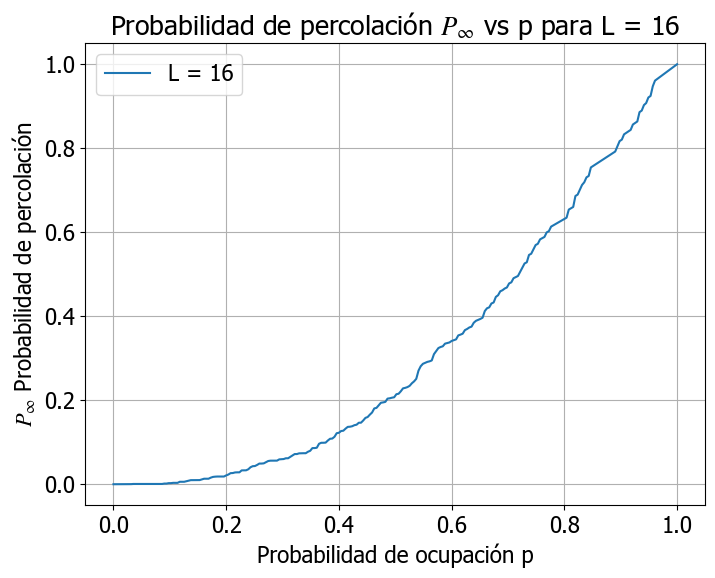

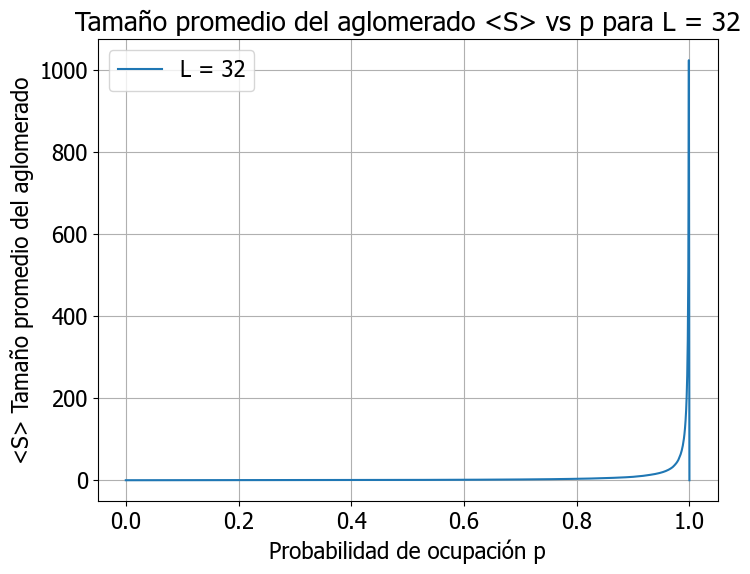

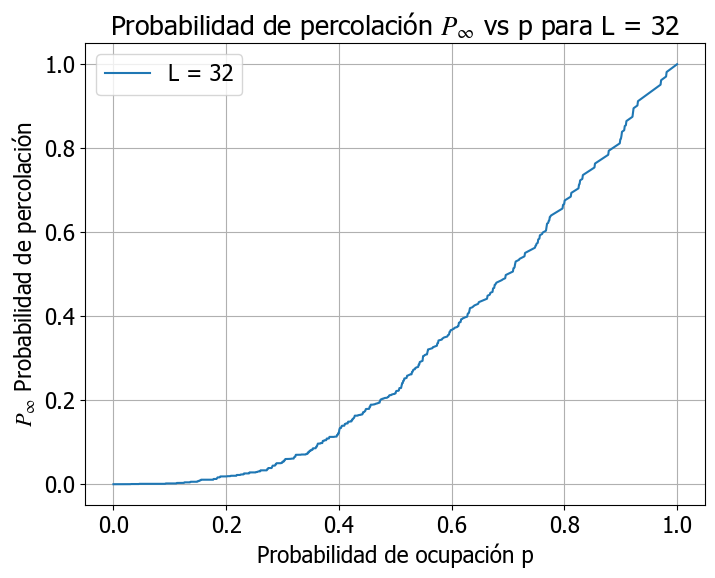

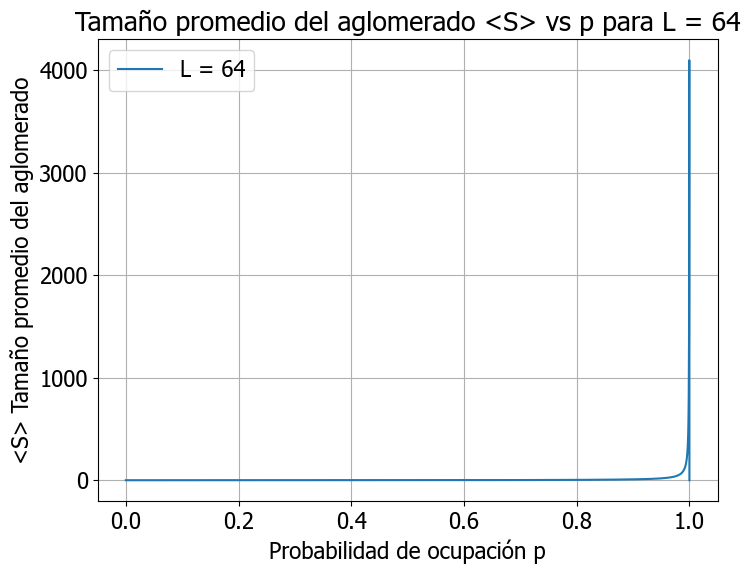

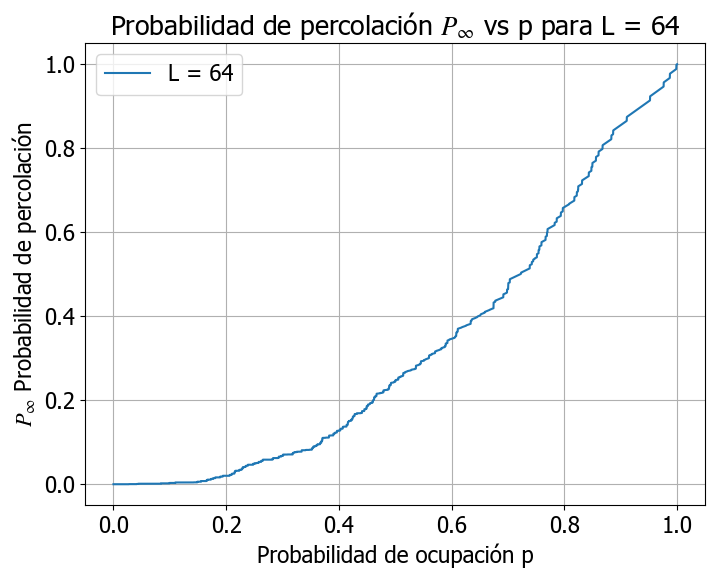

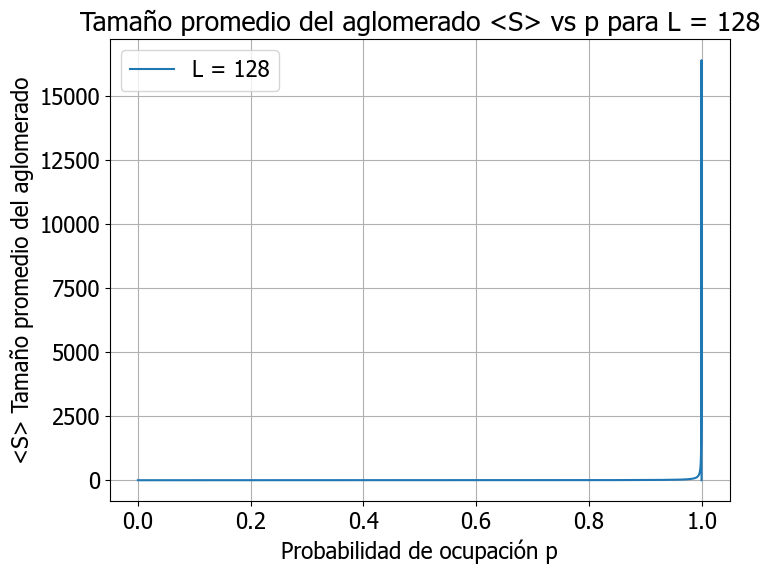

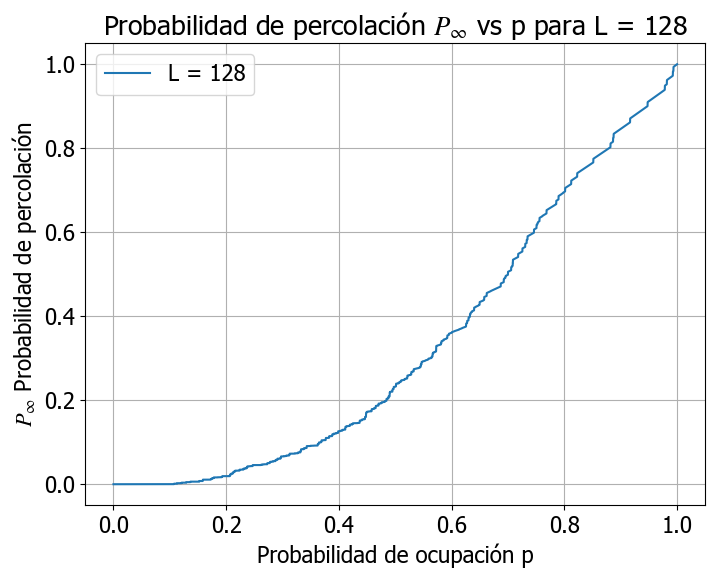

In [72]:
# Configurar estilo de gráficas
plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Tahoma']
plt.rc('mathtext', fontset='stix')

# Preparar los datos para las gráficas
for L in sizes:
    N = L**2
    p_values = np.linspace(0, 1, N)  # Generar valores de p entre 0 y 1

    S_avg = sprom_dict[L]  # Tamaño promedio del aglomerado para L
    P_infty_avg = Pspanprom_dict[L]  # Probabilidad de percolación para L

    # Gráfico del tamaño promedio del aglomerado <S> como función de p
    plt.figure(figsize=(8, 6))
    plt.plot(p_values, S_avg, label=f"L = {L}")
    plt.xlabel("Probabilidad de ocupación p")
    plt.ylabel("<S> Tamaño promedio del aglomerado")
    plt.title(f"Tamaño promedio del aglomerado <S> vs p para L = {L}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Gráfico de la probabilidad de percolación P_infty como función de p
    plt.figure(figsize=(8, 6))
    plt.plot(p_values, P_infty_avg, label=f"L = {L}")
    plt.xlabel("Probabilidad de ocupación p")
    plt.ylabel("$P_\\infty$ Probabilidad de percolación")
    plt.title(f"Probabilidad de percolación $P_\\infty$ vs p para L = {L}")
    plt.legend()
    plt.grid(True)
    plt.show()

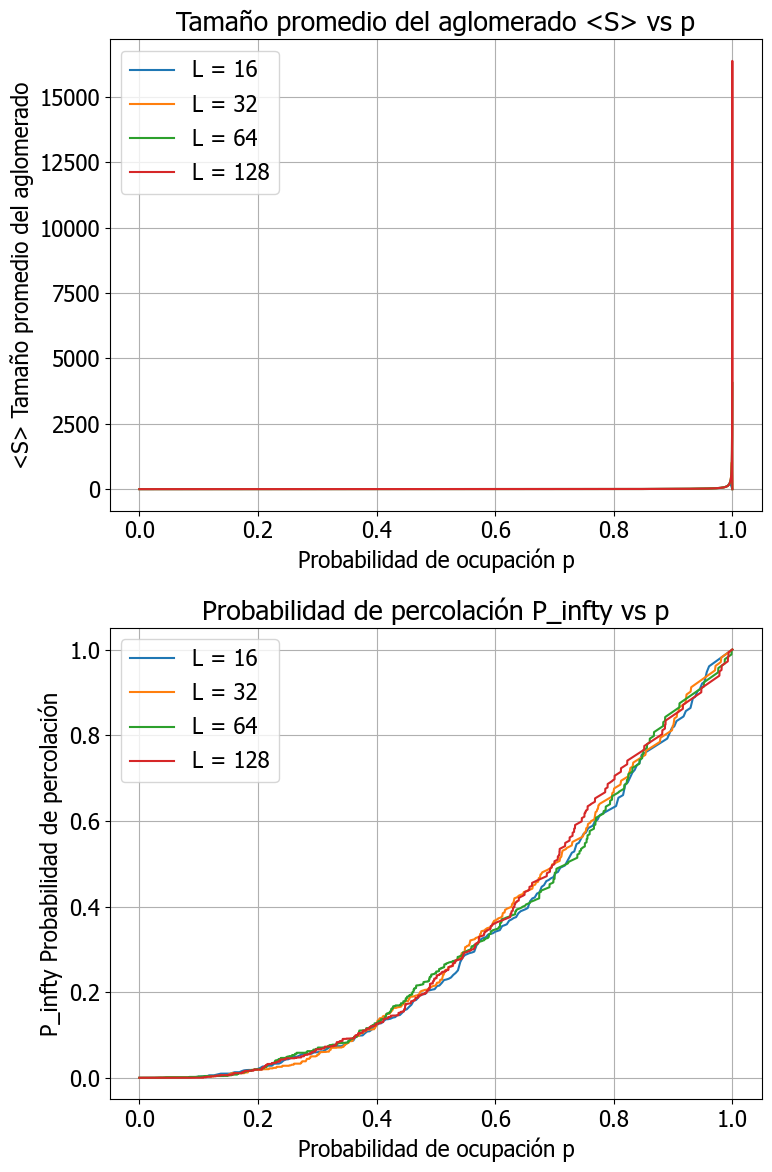

In [73]:
# Configurar estilo de gráficas
plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Tahoma']
plt.rc('mathtext', fontset='stix')

# Crear figura con dos subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

for L in sizes:
    N = L**2
    p_values = np.linspace(0, 1, N)  # Generar valores de p entre 0 y 1

    S_avg = sprom_dict[L]  # Tamaño promedio del aglomerado para L
    P_infty_avg = Pspanprom_dict[L]  # Probabilidad de percolación para L

    # Gráfico del tamaño promedio del aglomerado <S> como función de p
    axs[0].plot(p_values, S_avg, label=f"L = {L}")
    
    # Gráfico de la probabilidad de percolación P_infty como función de p
    axs[1].plot(p_values, P_infty_avg, label=f"L = {L}")

# Configurar el primer subplot
axs[0].set_xlabel("Probabilidad de ocupación p")
axs[0].set_ylabel("<S> Tamaño promedio del aglomerado")
axs[0].set_title("Tamaño promedio del aglomerado <S> vs p")
axs[0].legend()
axs[0].grid(True)

# Configurar el segundo subplot
axs[1].set_xlabel("Probabilidad de ocupación p")
axs[1].set_ylabel("P_infty Probabilidad de percolación")
axs[1].set_title("Probabilidad de percolación P_infty vs p")
axs[1].legend()
axs[1].grid(True)

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

## 7

In [74]:
def vecino(s, j):
    if j == 0:  # izquierda
        return s - 1 if s % L != 0 else s + L - 1
    elif j == 1:  # derecha
        return s + 1 if s % L != L - 1 else s - L + 1
    elif j == 2:  # abajo
        return s + L if s // L != L - 1 else s - L * (L - 1)
    elif j == 3:  # arriba
        return s - L if s // L != 0 else s + L * (L - 1)

def boundaries():
    nn = np.zeros((N, 4), dtype=int)
    for s in range(N):
        for j in range(4):
            nn[s, j] = vecino(s, j)
    return nn

In [75]:
# Tamaño de la red
L = 5
# Número total de sitios
N = L * L
# Representación de un sitio vacío (fuera de la red)
empty = -1


nn = boundaries()
nn

array([[ 4,  1,  5, 20],
       [ 0,  2,  6, 21],
       [ 1,  3,  7, 22],
       [ 2,  4,  8, 23],
       [ 3,  0,  9, 24],
       [ 9,  6, 10,  0],
       [ 5,  7, 11,  1],
       [ 6,  8, 12,  2],
       [ 7,  9, 13,  3],
       [ 8,  5, 14,  4],
       [14, 11, 15,  5],
       [10, 12, 16,  6],
       [11, 13, 17,  7],
       [12, 14, 18,  8],
       [13, 10, 19,  9],
       [19, 16, 20, 10],
       [15, 17, 21, 11],
       [16, 18, 22, 12],
       [17, 19, 23, 13],
       [18, 15, 24, 14],
       [24, 21,  0, 15],
       [20, 22,  1, 16],
       [21, 23,  2, 17],
       [22, 24,  3, 18],
       [23, 20,  4, 19]])

## 8

### funciones del problema 3 y 4

In [82]:
def permutation():
    global order, N
    order = np.random.permutation(N)

def vecino(s, j):
    global L, empty
    if j == 0:  # izquierda
        if s % L == 0:
            return empty
        else:
            return s - 1
    elif j == 1:  # derecha
        if s % L == L - 1:
            return empty
        else:
            return s + 1
    elif j == 2:  # abajo
        if s // L == 0:
            return empty
        else:
            return s - L
    elif j == 3:  # arriba
        if s // L == L - 1:
            return empty
        else:
            return s + L

def boundaries():
    global N, nn
    for s in range(N):
        for j in range(4):
            nn[s, j] = vecino(s, j)

def findroot(r):
    global parent
    while parent[r] >= 0:
        r = parent[r]
    return r

def mergeroots(r1, r2):
    global spanclussize, parent, ns, touchesLeft, touchesRight, Ss, sum_s2_ns
    if r1 == r2:
        return r1
    elif -parent[r1] > -parent[r2]:
        ns[-parent[r1]] -= 1
        ns[-parent[r2]] -= 1
        sum_s2_ns -= parent[r1]**2
        sum_s2_ns -= parent[r2]**2
        parent[r1] += parent[r2]
        parent[r2] = r1
        ns[-parent[r1]] += 1
        sum_s2_ns += parent[r1]**2
        touchesLeft[r1] = touchesLeft[r1] or touchesLeft[r2]
        touchesRight[r1] = touchesRight[r1] or touchesRight[r2]
        if touchesLeft[r1] and touchesRight[r1]:
            spanclussize = -parent[r1]
        return r1
    else:
        ns[-parent[r1]] -= 1
        ns[-parent[r2]] -= 1
        sum_s2_ns -= parent[r1]**2 
        sum_s2_ns -= parent[r2]**2
        parent[r2] += parent[r1]
        parent[r1] = r2
        ns[-parent[r2]] += 1
        sum_s2_ns += parent[r2]**2
        touchesLeft[r2] = touchesLeft[r2] or touchesLeft[r1]
        touchesRight[r2] = touchesRight[r2] or touchesRight[r1]
        if touchesLeft[r2] and touchesRight[r2]:
            spanclussize = -parent[r2]
        return r2
    
def percolate():
    global spanclussize, order, parent, nn, ipc, ns, S, Ss, sum_s2_ns

    PSpan = []
    spanclussize = 0
    ns = np.zeros(N + 1, dtype=int)
    nspcpar = np.zeros(N + 1, dtype=int)  # Inicializar nspcpar aquí

    parent = empty * np.ones(N, dtype=int)

    S = []
    sum_s2_ns = 0  # Inicializar la suma acumulativa de s**2 * ns
    den = 0 

    for i in range(N):
        r1 = s1 = order[i]
        parent[s1] = -1
        ns[1] += 1
        sum_s2_ns += 1
        for j in range(4):
            s2 = nn[s1, j]
            if s2 != empty and parent[s2] != empty:
                r1 = mergeroots(r1, findroot(s2))
        
        PSpan.append(spanclussize / (i + 1))

        den = (i+1 - spanclussize)
        if den == 0:
            Ss = 0
        else:
            Ss = (sum_s2_ns - (spanclussize**2)) / den
        
        S.append(Ss)

        if i + 1 > spanclussize:
            S[i] = (sum_s2_ns - spanclussize**2) / (i + 1 - spanclussize)

        if i == ipc:
            nspcpar = np.copy(ns)

    return np.array(PSpan), nspcpar, S

### simulación

In [83]:
# Configuración inicial
global L, N, empty, parent, nn, order, spanclussize, touchesLeft, touchesRight, S

sizes = [16, 32, 64, 128, 256]
muestras = 100

sprom_dict = {}
Pspanprom_dict = {}
nspc_dic = {}
Smax = {}
P_infty = {}
pc = 0.59275

for L in sizes:
    N = L**2
    empty = -(N + 1)
    nn = np.zeros((N, 4), dtype=int)
    boundaries()

    ipc = int(N * pc) - 1
    s = np.arange(0, N + 1, 1, dtype=int)
    nspcprom = np.zeros(N)
    Sprom = np.zeros(N)
    sprom = np.zeros(N)
    Pspanprom = np.zeros(N)

    for _ in range(muestras):
        touchesLeft = [i % L == 0 for i in range(N)]
        touchesRight = [i % L == L - 1 for i in range(N)]
        parent = empty * np.ones(N, dtype=int)
        permutation()
        PSpan, nspc, S = percolate()
        nspc = nspc[1:]
        Pspanprom += PSpan
        nspcprom += nspc
        sprom += S

    if spanclussize == muestras:
        sprom_dict[L] = np.nan
    else:
        sprom_dict[L] = sprom / muestras

    Pspanprom /= muestras
    nspcprom /= muestras

    Pspanprom_dict[L] = Pspanprom
    P_infty[L] = Pspanprom[ipc]
    nspc_dic[L] = nspcprom
    Smax[L] = sprom.max()

### gráficas 

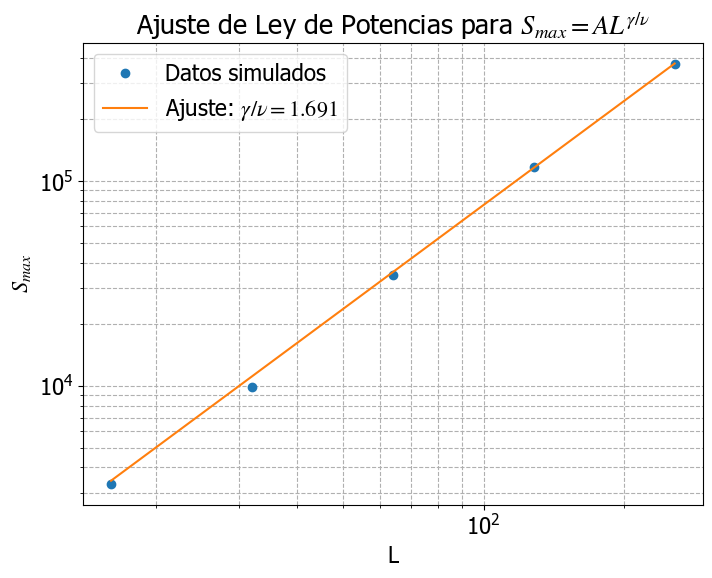

In [84]:
# Convertir L y Smax_vals a arrays de numpy
L = np.array(list(Smax.keys()))
Smax_vals = np.array(list(Smax.values()))

# Función para el ajuste de ley de potencias
def power_law(L, A, gamma_over_nu):
    return A * np.power(L, gamma_over_nu)

# Realizar el ajuste log-log
params, covariance = curve_fit(power_law, L, Smax_vals)

# Parámetros del ajuste
A_fit, gamma_over_nu_fit = params

# Generar datos de ajuste para la visualización
L_fit = np.linspace(min(L), max(L), 100)
Smax_fit = power_law(L_fit, A_fit, gamma_over_nu_fit)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.loglog(L, Smax_vals, 'o', label='Datos simulados')
plt.loglog(L_fit, Smax_fit, '-', label=f'Ajuste: $\gamma/\\nu = {gamma_over_nu_fit:.3f}$')
plt.xlabel('L')
plt.ylabel('$S_{max}$')
plt.title('Ajuste de Ley de Potencias para $S_{max} = AL^{\gamma/\\nu}$')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

## 9

In [87]:
def box_counting(image, sizes):
    """
    Counts the number of boxes of different sizes that contain a part of the fractal.

    Parameters:
    - image (2D numpy array): Binary array representing the fractal, where 1s represent the fractal.
    - sizes (list of int): Box sizes to use for counting.

    Returns:
    - list: Number of boxes that contain part of the fractal for each size.
    """
    counts = []
    for size in sizes:
        count = 0
        # Create a grid of boxes of the given size
        for i in range(0, image.shape[0], size):
            for j in range(0, image.shape[1], size):
                # Check if the box contains part of the fractal
                if np.any(image[i:i+size, j:j+size]):
                    count += 1
        counts.append(count)
    return counts

def calculate_fractal_dimension(counts, sizes):
    """
    Calculates the fractal dimension from the box counting.

    Parameters:
    - counts (list of int): Number of boxes for each size that contain the fractal.
    - sizes (list of int): Sizes of boxes used for counting.

    Returns:
    - float: Estimated fractal dimension.
    """
    log_counts = np.log(counts)
    log_sizes = np.log(1 / np.array(sizes))  # Inverse of size because we want to compare with smaller boxes
    coefficients = np.polyfit(log_sizes, log_counts, 1)
    return coefficients[0]  # The slope is the fractal dimension

In [89]:
def sierpinski_carpet(order, size):
    """
    Generate a Sierpinski carpet.

    Parameters:
    - order (int): The recursion depth. Higher order means more detail in the fractal.
    - size (int): The size of the square array to generate.

    Returns:
    - numpy.ndarray: A binary 2D array representing the Sierpinski carpet.
    """
    carpet = np.ones((size, size))
    
    def remove_squares(order, x, y, size):
        if order == 0:
            return
        new_size = size // 3
        carpet[x+new_size:x+2*new_size, y+new_size:y+2*new_size] = 0  # Remove the central square
        
        for dx in range(0, size, new_size):
            for dy in range(0, size, new_size):
                if dx != new_size or dy != new_size:  # Only continue with non-central squares
                    remove_squares(order-1, x+dx, y+dy, new_size)
    
    remove_squares(order, 0, 0, size)
    return carpet

# Now let's generate the fractal image
order_of_fractal = 6  # This can be set to a different value depending on the desired detail
size_of_image = 1024  # Must be a power of 3 for the Sierpinski carpet

fractal_image = sierpinski_carpet(order_of_fractal, size_of_image)

Fractal Dimension: 1.9077349200100429


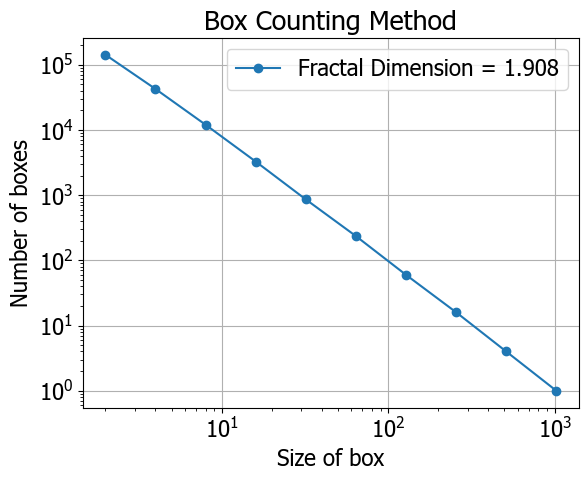

In [90]:

box_sizes = [2**i for i in range(1, 11)]  # Example box sizes (powers of 2)

counts = box_counting(fractal_image, box_sizes)
fractal_dimension = calculate_fractal_dimension(counts, box_sizes)

print("Fractal Dimension:", fractal_dimension)

# Plot the box counting results
plt.figure()
plt.loglog(box_sizes, counts, 'o-', label=f'Fractal Dimension = {fractal_dimension:.3f}')
plt.xlabel('Size of box')
plt.ylabel('Number of boxes')
plt.title('Box Counting Method')
plt.legend()
plt.grid(True)
plt.show()

## 10

In [93]:
def sierpinski_carpet(order, size, randomize=False):
    """
    Generate a Sierpinski carpet with recursion.
    
    Parameters:
    - order (int): The recursion depth.
    - size (int): The size of the carpet.
    - randomize (bool): If True, randomize the central square's removal.
    
    Returns:
    - numpy.ndarray: Array representing the Sierpinski carpet.
    """
    carpet = np.ones((size, size))
    
    def remove_squares(order, x, y, size):
        if order == 0:
            return
        
        new_size = size // 3
        # Randomize the position of the central square if requested
        if randomize:
            dx, dy = random.choice([(0, 1), (1, 0), (1, 2), (2, 1)])
            carpet[x+dx*new_size:x+(dx+1)*new_size, y+dy*new_size:y+(dy+1)*new_size] = 0
        else:
            carpet[x+new_size:x+2*new_size, y+new_size:y+2*new_size] = 0
        
        for dx in range(3):
            for dy in range(3):
                if dx != 1 or dy != 1:  # Skip the center square for the recursive step
                    remove_squares(order-1, x+dx*new_size, y+dy*new_size, new_size)
    
    remove_squares(order, 0, 0, size)
    return carpet

# Generate Sierpinski Carpet
order = 6
size = 3 ** order
standard_carpet = sierpinski_carpet(order, size, randomize=False)
randomized_carpet = sierpinski_carpet(order, size, randomize=True)

# Calculate and print the fractal dimensions
print("Standard Carpet Fractal Dimension:", calculate_fractal_dimension(box_counting(standard_carpet, [2**i for i in range(1, order+1)]), [2**i for i in range(1, order+1)]))
print("Randomized Carpet Fractal Dimension:", calculate_fractal_dimension(box_counting(randomized_carpet, [2**i for i in range(1, order+1)]), [2**i for i in range(1, order+1)]))

# Plotting is as shown previously in the 'plot_power_law' function


Standard Carpet Fractal Dimension: 1.864612638808346
Randomized Carpet Fractal Dimension: 1.8914269754935398


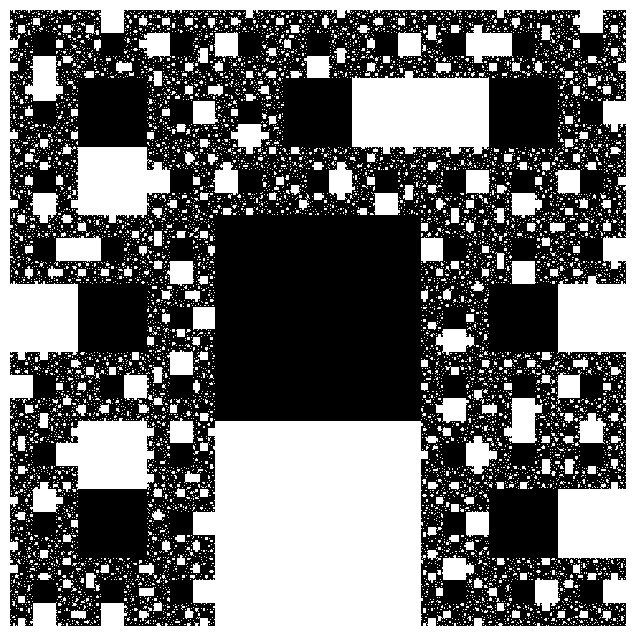

In [94]:
order = 6
size = 3 ** order
carpet = sierpinski_carpet(order, size, randomize=True)

# Visualización del fractal
plt.figure(figsize=(8, 8))
plt.imshow(carpet, cmap='binary', interpolation='nearest')
plt.axis('off')  # No mostrar los ejes
plt.show()